In [1]:
from zipfile import ZipFile
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import os

from azureml.core import Workspace
from azureml.core import Experiment
from azureml.core import Workspace, Datastore, Dataset

In [18]:
#Interactive Authentication

with open(os.path.expanduser('./../configuration/config.json')) as f:
    config = json.load(f)

workspace_name = config["workspace_name"]
resource_group = config["resource_group"]
subscription_id = config["subscription_id"]
location = config["location"]


ws = Workspace.get(
        name=workspace_name,
        subscription_id=subscription_id,
        resource_group=resource_group,
    )

#print('Workspace name: ' + ws.name, 'Azure region: ' + ws.location, 'Subscription id: ' + ws.subscription_id,'Resource group: ' + ws.resource_group, sep='\n')

In [2]:
#Service Principal Authentication

from azureml.core.authentication import ServicePrincipalAuthentication
import os

base_dir='./../configuration'
config_json = os.path.join(base_dir, "config.json")
with open(config_json, "r") as f:
    config = json.load(f)

workspace_name = config["workspace_name"]
resource_group = config["resource_group"]
subscription_id = config["subscription_id"]
location = config["location"]
    
auth = ServicePrincipalAuthentication(
    tenant_id=config["tenant_id"],
    service_principal_id=config["service_principal_id"],
    service_principal_password=config["service_principal_password"],
)

ws = Workspace.get(
        name=workspace_name,
        subscription_id=subscription_id,
        resource_group=resource_group,        
        auth=auth
    )

#print('Workspace name: ' + ws.name, 'Azure region: ' + ws.location, 'Subscription id: ' + ws.subscription_id,'Resource group: ' + ws.resource_group, sep='\n')

In [3]:
url = 'https://github.com/asherif844/MLOps/raw/master/data/AdventureWorks-oltp-install-script.zip'
zip_data = requests.get(url)
zip_data

<Response [200]>

In [4]:
with open('./../data/adventureworks.zip', 'wb') as f:
    f.write(zip_data.content)

In [ ]:
with ZipFile('./../data/adventureworks.zip', 'r') as fzip:
    fzip.extractall('./data/csv_data')

In [3]:
header = ['TransactionID', 'ProductID', 'ReferenceOrderID', 'ReferenceOrderLineID', 'TransactionDate', 'TransactionType', 'Quantity', 'ActualCost', 'ModifiedDate']

trans_hist_df = pd.read_csv('./data/csv_data/TransactionHistory.csv', sep='\t', names=header)
trans_hist_df.head()

,TransactionID,ProductID,ReferenceOrderID,ReferenceOrderLineID,TransactionDate,TransactionType,Quantity,ActualCost,ModifiedDate
0,100000,784,41590,0,2013-07-31 00:00:00,W,2,0.0,2013-07-31 00:00:00
1,100001,794,41591,0,2013-07-31 00:00:00,W,1,0.0,2013-07-31 00:00:00
2,100002,797,41592,0,2013-07-31 00:00:00,W,1,0.0,2013-07-31 00:00:00
3,100003,798,41593,0,2013-07-31 00:00:00,W,1,0.0,2013-07-31 00:00:00
4,100004,799,41594,0,2013-07-31 00:00:00,W,1,0.0,2013-07-31 00:00:00


In [4]:
trans_hist_df['ProductID'].value_counts().head(10)

870    2089
873    1505
921    1432
712    1181
707    1124
708    1119
922    1083
711    1079
878     956
871     899
Name: ProductID, dtype: int64

In [5]:
trans_hist_df['PaidAmount'] = trans_hist_df['Quantity'] * trans_hist_df['ActualCost']
trans_hist_df['TransactionDate'] = pd.to_datetime(trans_hist_df['TransactionDate'])
df = trans_hist_df[['TransactionDate', 'PaidAmount']]
df.set_index('TransactionDate',inplace=True)
df.tail(10)

,PaidAmount
TransactionDate,
2014-01-14,8.99
2014-01-14,29.99
2014-01-14,3.99
2014-01-14,24.99
2014-01-14,4.99
2014-01-14,8.99
2014-01-14,2319.99
2014-01-14,2.29
2014-01-14,159.00


In [6]:
df.resample('D').mean()

,PaidAmount
TransactionDate,
2013-07-31,1346.012283
2013-08-01,175.203084
2013-08-02,196.180443
2013-08-03,74.535107
2013-08-04,1131.985919
2013-08-05,891.103746
2013-08-06,1302.058402
2013-08-07,965.864143
2013-08-08,1172.404491


In [7]:
df = df.resample('D').mean().interpolate()
df.head()

,PaidAmount
TransactionDate,
2013-07-31,1346.012283
2013-08-01,175.203084
2013-08-02,196.180443
2013-08-03,74.535107
2013-08-04,1131.985919


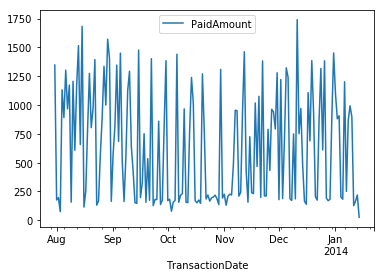

In [8]:
df.plot()
plt.show()

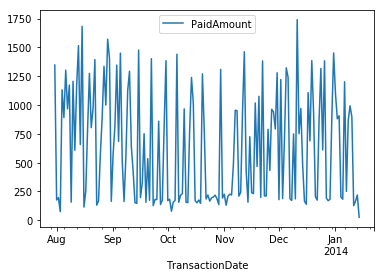

In [12]:
df['2013-07':'2014-05'].plot()
plt.show()

In [9]:
df = df['2013-07':'2014-05']
df1 = df['2013']
df2 = df['2014']

In [10]:
df.to_csv('./data/mlops_forecast_data.csv', index=True, header=True)
df1.to_csv('./data/mlops_forecast_data2013.csv', index=True, header=True)
df2.to_csv('./data/mlops_forecast_data2014.csv', index=True, header=True)

In [11]:
datastore = ws.get_default_datastore()
datastore.upload_files(files = ['./data/mlops_forecast_data.csv'], target_path = 'mlops_timeseries/', overwrite = True,show_progress = True)

Uploading an estimated of 1 files
Uploading ./data/mlops_forecast_data.csv
Uploaded ./data/mlops_forecast_data.csv, 1 files out of an estimated total of 1
Uploaded 1 files


$AZUREML_DATAREFERENCE_f89f90f19fd34f73a9af0962d937ddb7

In [12]:
datastore.upload_files(files = ['./data/mlops_forecast_data2013.csv', './data/mlops_forecast_data2014.csv'], target_path = 'mlops_timeseries/', overwrite = True,show_progress = True)

Uploading an estimated of 2 files
Uploading ./data/mlops_forecast_data2013.csv
Uploading ./data/mlops_forecast_data2014.csv
Uploaded ./data/mlops_forecast_data2014.csv, 1 files out of an estimated total of 2
Uploaded ./data/mlops_forecast_data2013.csv, 2 files out of an estimated total of 2
Uploaded 2 files


$AZUREML_DATAREFERENCE_90e5ba7ddf03410f9f9ef33d8451f246

In [75]:
dataset = Dataset.Tabular.from_delimited_files(path=datastore.path('mlops_timeseries/mlops_forecast_data.csv'))
dataset.to_pandas_dataframe().head()

,TransactionDate,PaidAmount
0,2013-07-31,1346.01
1,2013-08-01,175.20
2,2013-08-02,196.18
3,2013-08-03,74.54
4,2013-08-04,1131.99


In [13]:
dataset1 = Dataset.Tabular.from_delimited_files(path=datastore.path('mlops_timeseries/mlops_forecast_data2013.csv'))
dataset1.to_pandas_dataframe().head()

,TransactionDate,PaidAmount
0,2013-07-31,1346.012283
1,2013-08-01,175.203084
2,2013-08-02,196.180443
3,2013-08-03,74.535107
4,2013-08-04,1131.985919


In [14]:
dataset2 = Dataset.Tabular.from_delimited_files(path=datastore.path('mlops_timeseries/mlops_forecast_data2014.csv'))
dataset2.to_pandas_dataframe().head()

,TransactionDate,PaidAmount
0,2014-01-01,1102.264914
1,2014-01-02,879.901593
2,2014-01-03,906.264917
3,2014-01-04,200.178467
4,2014-01-05,181.908123


In [76]:
ts_ds = dataset.register(workspace = ws,
                         name = 'transaction_ts',
                         description='time series dataset for mlops',
                         create_new_version=True)

In [ ]:
ts_ds1 = dataset1.register(workspace = ws,
                         name = 'transaction_ts2013',
                         description='2013 time series dataset for mlops',
                         create_new_version=True)

In [ ]:
ts_ds2 = dataset.register(workspace = ws,
                         name = 'transaction_ts2014',
                         description='2014 time series dataset for mlops',
                         create_new_version=True)

In [77]:
ts_ds

{
  "source": [
    "('workspacefilestore', 'mlops_timeseries/mlops_forecast_data.csv')"
  ],
  "definition": [
    "GetDatastoreFiles",
    "ParseDelimited",
    "DropColumns",
    "SetColumnTypes"
  ],
  "registration": {
    "id": "88ea0f06-10e0-4e7f-8679-bb40b535886a",
    "name": "transaction_ts",
    "version": 1,
    "description": "time series dataset for mlops",
    "workspace": "Workspace.create(name='ShivaMLservice', subscription_id='46668180-b0ad-4a49-bed9-88f16f315dce', resource_group='MLGroup')"
  }
}